In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import numpy as np
from scipy.signal import welch
from scipy.signal import find_peaks, peak_widths
import numpy as np
import pywt
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


Data Formatting and Prepration

In [2]:
def split_row_into_segments(df):
    split_data = []

    for index, row in df.iterrows():
        samples = row[:6250].values
        sensor = row[6250]
        label = row[6251]

        for i in range(0, len(samples), 125):
            segment = list(samples[i:i+125]) + [sensor, label]
            split_data.append(segment)

    split_df = pd.DataFrame(split_data)

    return split_df

In [3]:
Train_data = pd.read_csv("Train.csv")

In [5]:
temp_data = Train_data.drop(columns=["Sensor", "Action_Person"]).to_numpy()

In [15]:
pca = PCA(0.90)
pca.fit(temp_data)


PCA(n_components=0.9)

In [23]:
pca.components_.shape

(111, 6250)

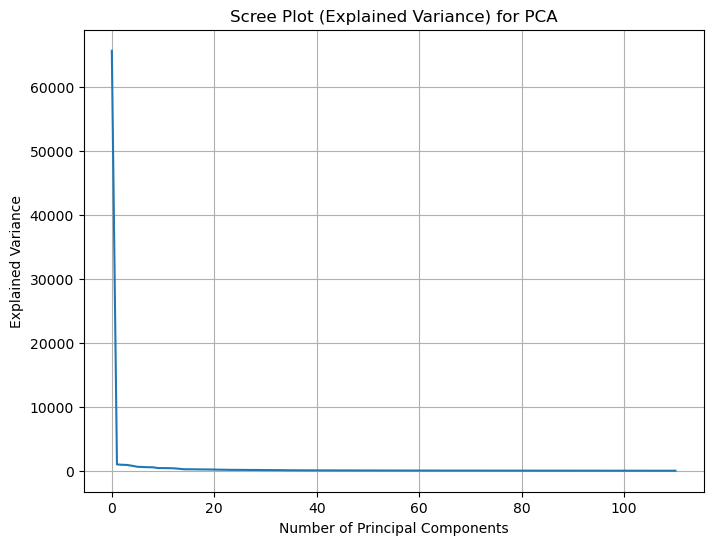

In [22]:
explained_variance = pca.explained_variance_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot (Explained Variance) for PCA')
plt.grid()
plt.show()

In [7]:
Train_data = split_row_into_segments(Train_data)

In [17]:
from sklearn.decomposition import PCA

temp_frame1 = Train_data.drop(columns=[125,126]).to_numpy()

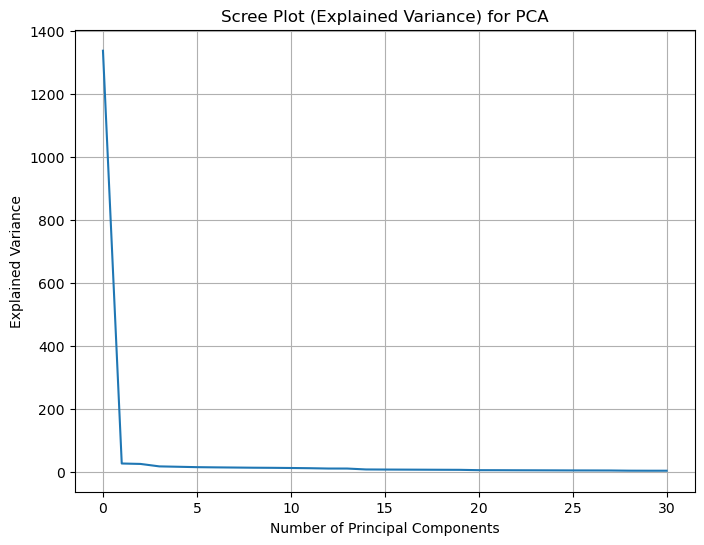

In [21]:
pca_ = PCA(0.90)
pca_.fit(temp_frame1)

explained_variance = pca_.explained_variance_

plt.figure(figsize=(8, 6))
plt.plot(explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot (Explained Variance) for PCA')
plt.grid()
plt.show()

In [25]:
pca_.components_.shape

(31, 125)

In [168]:
def find_optimal_k(data, max_k=10):

    inertia = []

    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.grid(True)
    plt.show()

    optimal_k = determine_optimal_k(inertia)

    return optimal_k

def determine_optimal_k(inertia_values):
    diff = [inertia_values[i] - inertia_values[i + 1] for i in range(len(inertia_values) - 1)]
    optimal_k = diff.index(max(diff)) + 1
    return optimal_k


In [169]:
def divide_KMeans(data, optimal_val_k):
    
    model_KMeans = KMeans(n_clusters=optimal_val_k, random_state=42)

    data_labels = model_KMeans.fit_predict(data)

    ret_list = [[] for _ in range(optimal_val_k)]

    for index,data_label in enumerate(data_labels):

        ret_list[data_label].append(index)

    return ret_list

In [170]:
def Cluster_original(Train_Data, optimal_k=3):

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    predictions = kmeans.fit_predict(Train_Data)

    return predictions, kmeans.cluster_centers_


In [171]:
label_encoder = preprocessing.LabelEncoder()
Train_data[126] = label_encoder.fit_transform(Train_data[126])

In [172]:
labels = Train_data[126]
Train_data.drop(columns=[126],inplace=True)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(Train_data, labels, test_size=0.2,random_state=42)

In [174]:
Sensors = X_train[125]
X_train.drop(columns=[125],inplace=True)

In [175]:
def Cluster_original(Train_Data, optimal_k=3):

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(Train_Data)

    ret_lst = []

    for cluster in kmeans.cluster_centers_:
        temp_lst = []
        for point in Train_Data.to_numpy():
            temp_lst.append(np.linalg.norm(cluster - point))

        ret_lst.append(temp_lst)

    return ret_lst,kmeans


In [176]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
259709,-6.815300,-7.306400,-7.695100,-7.637600,-7.346600,-7.045900,-7.195600,-7.331800,-7.211000,-7.128300,...,-7.865100,-7.414400,-7.049800,-7.287800,-7.277300,-7.458800,-7.229500,-6.984000,-6.754000,-6.627300
333196,0.082238,-0.723000,0.633860,1.382300,2.261800,2.638900,1.117000,-0.923250,-1.195300,-1.084900,...,1.254800,1.863500,1.295200,0.355490,0.298440,0.253670,0.058973,-0.170900,-0.351370,-0.517720
209796,8.121700,3.739100,3.603600,4.714200,6.392600,12.803000,10.445000,8.754500,9.773200,6.580500,...,9.971700,9.438500,10.535000,6.388900,5.117600,4.441000,4.884600,4.739000,10.729000,7.210400
266947,10.033000,11.425000,12.965000,14.613000,14.112000,16.127000,16.304000,15.897000,14.767000,13.040000,...,-1.800200,1.367000,3.787000,7.164900,9.170800,12.173000,16.179000,15.595000,13.376000,14.016000
46230,0.089199,0.090122,0.089343,0.089372,0.090651,0.091393,0.090141,0.088608,0.090856,0.090429,...,0.090075,0.089367,0.090248,0.089713,0.090613,0.090746,0.088927,0.089363,0.089135,0.089849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.013786,0.042283,0.020892,0.008193,0.017391,0.002804,0.017297,0.013880,0.015682,0.020929,...,-0.004328,0.004527,0.009860,-0.016921,-0.027662,-0.009754,-0.019571,-0.007844,-0.027554,0.012651
259178,-0.070162,-0.065368,-0.066700,-0.073825,-0.080842,-0.088333,-0.095016,-0.098536,-0.101250,-0.100530,...,-0.093182,-0.096994,-0.100200,-0.101130,-0.097858,-0.087922,-0.077002,-0.072532,-0.071711,-0.075156
131932,1.859500,1.108400,2.161100,2.378900,6.043800,3.806500,0.651120,-1.742900,0.026980,0.533360,...,2.305500,2.410200,2.109700,1.996500,1.749100,1.704600,1.719900,1.750200,1.644500,1.989300
146867,0.182250,0.123450,0.197690,0.216740,0.387870,0.468900,-0.186770,-0.485870,-0.138840,-0.223990,...,0.001678,0.175250,0.306880,0.556110,0.844990,0.897950,1.151500,0.762490,0.213790,0.666980


In [177]:
KMeans_Data,cluster_center = Cluster_original(Train_Data=X_train)

In [178]:
X_train["Labels"] = y_train
X_train["KMeans1"] = KMeans_Data[0]
X_train["KMeans2"] = KMeans_Data[1]
X_train["KMeans3"] = KMeans_Data[2]
X_train["Sensor"] = Sensors

In [179]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,Labels,KMeans1,KMeans2,KMeans3,Sensor
259709,-6.815300,-7.306400,-7.695100,-7.637600,-7.346600,-7.045900,-7.195600,-7.331800,-7.211000,-7.128300,...,-7.458800,-7.229500,-6.984000,-6.754000,-6.627300,115,80.198836,167.087043,17.998861,LA-yacc
333196,0.082238,-0.723000,0.633860,1.382300,2.261800,2.638900,1.117000,-0.923250,-1.195300,-1.084900,...,0.253670,0.058973,-0.170900,-0.351370,-0.517720,148,14.356409,92.664314,93.928548,T-xgyro
209796,8.121700,3.739100,3.603600,4.714200,6.392600,12.803000,10.445000,8.754500,9.773200,6.580500,...,4.441000,4.884600,4.739000,10.729000,7.210400,93,89.283864,33.481911,183.560803,RA-yacc
266947,10.033000,11.425000,12.965000,14.613000,14.112000,16.127000,16.304000,15.897000,14.767000,13.040000,...,12.173000,16.179000,15.595000,13.376000,14.016000,118,126.643127,76.368275,213.374226,RL-yacc
46230,0.089199,0.090122,0.089343,0.089372,0.090651,0.091393,0.090141,0.088608,0.090856,0.090429,...,0.090746,0.088927,0.089363,0.089135,0.089849,20,1.362921,85.577052,99.026279,LA-xmag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.013786,0.042283,0.020892,0.008193,0.017391,0.002804,0.017297,0.013880,0.015682,0.020929,...,-0.009754,-0.019571,-0.007844,-0.027554,0.012651,53,0.497437,86.494801,98.109205,RA-xgyro
259178,-0.070162,-0.065368,-0.066700,-0.073825,-0.080842,-0.088333,-0.095016,-0.098536,-0.101250,-0.100530,...,-0.087922,-0.077002,-0.072532,-0.071711,-0.075156,115,0.622326,87.548588,97.054860,T-zmag
131932,1.859500,1.108400,2.161100,2.378900,6.043800,3.806500,0.651120,-1.742900,0.026980,0.533360,...,1.704600,1.719900,1.750200,1.644500,1.989300,58,24.068879,66.455928,119.574211,RL-yacc
146867,0.182250,0.123450,0.197690,0.216740,0.387870,0.468900,-0.186770,-0.485870,-0.138840,-0.223990,...,0.897950,1.151500,0.762490,0.213790,0.666980,65,6.989523,86.669838,98.460174,RA-xgyro


In [180]:
Grouped_data = X_train.groupby("Sensor")

In [181]:
len(y_test)

68400

In [182]:
Sensor_test = X_test[125]
X_test.drop(columns=[125], inplace=True)

In [183]:
def calculate_higher_moments(data,low,high):
    data = np.array(data)

    mean = np.mean(data)

    moments = []
    for n in range(low, high+1):
        moment = np.mean((data - mean)**n)
        moments.append(moment)

    return moments

def Feature_Extraction_train(DataFrame):
    Dict = {}
    Dict_label = {}
    for sensor, grouped_data in DataFrame:

        labels = grouped_data["Labels"]
        KMeans1 = grouped_data["KMeans1"]
        KMeans2 = grouped_data["KMeans2"]
        KMeans3 = grouped_data["KMeans3"]

        grouped_data.drop(columns=["Sensor", "Labels", "KMeans1", "KMeans2", "KMeans3"],inplace=True)
        
        group_list = grouped_data.values.tolist()

        Dict[sensor] = []
        Dict_label[sensor] = []
        for label,row,km1,km2,km3 in zip(labels,group_list, KMeans1, KMeans2, KMeans3):

            # Stastistcal Features
            row = np.array(row)
            surface_area = np.sum(np.abs(row))
            Mean = np.mean(row)
            Var = np.var(row)
            Std = np.std(row)
            peak = np.max(np.abs(row))
            rms = np.sqrt(np.mean(row**2))
            power = rms**2
            
            skewness = np.mean(((row - Mean) ** 3) / np.std(row) ** 3)
            kurtosis = np.mean(((row - Mean) ** 4) / np.std(row) ** 4)
            p2p_distance = max(row) - min(row)
            peaks,_ = find_peaks(row)
            number_peaks = len(peaks)
            slope = np.mean(np.gradient(row))
            auc = np.trapz(row)

            fft_result = np.fft.fft(row)
            sample_rate = 25

            frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_rate)

            magnitude = np.abs(fft_result)

            dominant_freq = frequencies[np.argmax(magnitude)]

            spectral_centroid = np.sum(frequencies * magnitude) / np.sum(magnitude)

            mean_freq = np.sum(frequencies * magnitude) / np.sum(magnitude)
            spectral_bandWidth = np.sqrt(np.sum(((frequencies - mean_freq) ** 2) * magnitude) / np.sum(magnitude))

            spectral_flatness = np.exp(np.mean(np.log(magnitude + 1e-10)))
       
            fourier_asd = np.abs(fft_result)

            fourier_mean = np.mean(fourier_asd)
            fourier_var = np.var(fourier_asd)
            fourier_std = np.std(fourier_asd)
            fourier_peak = np.max(fourier_asd)
            fourier_surface_Area = np.sum(np.abs(fourier_asd))
            fourier_power = np.sum(np.square(fourier_asd))
            fourier_rms = np.sqrt(np.mean(np.square(fourier_asd)))
            fourier_skewness = np.mean(((fourier_asd - fourier_mean) ** 3) / np.std(fourier_asd) ** 3)
            fourier_kurtosis = np.mean(((fourier_asd - fourier_mean) ** 4) / np.std(fourier_asd) ** 4)

            # Some additional features to just increase # of features to help in PCA application

            velocity = np.gradient(row)
            jerk = np.gradient(velocity)
            rate_of_change = np.mean(np.abs(velocity))
            slope_changes = len(find_peaks(velocity, height=0)[0])
            frequency_modulations = len(find_peaks(jerk, height=0)[0])
            envelope_amplitude = np.abs(row)
            max_envelope = np.max(envelope_amplitude)
            min_envelope = np.min(envelope_amplitude)

            Q1 = np.percentile(row, 25)
            Q3 = np.percentile(row, 75)

            IQR = Q3 - Q1
            Zero_Crossing_Rate = ((row[:-1] * row[1:]) < 0).sum()
            probabilities = np.unique(row, return_counts=True)[1] / len(row)
            Entropy = -np.sum(probabilities * np.log2(probabilities))
            autocorr = np.correlate(row, row, mode='full')
            ACF =  autocorr[len(row) - 1 + 1] / autocorr.max()
            moments = calculate_higher_moments(row,5,10)

            wavelet = 'haar'  
            level = 5         

            coeffs = pywt.wavedec(row, wavelet, level=level)

            energy_features = [np.sum(np.square(c)) for c in coeffs]

            median = np.median(row)

            # Calculate median absolute deviation
            median_abs_dev = np.median(np.abs(row - median))

            # Calculate interquartile range
            q75, q25 = np.percentile(row, [75, 25])
            interquartile_range = q75 - q25

            # Calculate negative and positive counts
            negative_count = np.sum(row < 0)
            positive_count = np.sum(row > 0)

            autocorrelation = np.correlate(row, row, mode='full') / (np.std(row) * len(row))


            temp_dict =  [Mean, Std, kurtosis, skewness, rms,p2p_distance, number_peaks, slope, auc
                      , dominant_freq, spectral_centroid, spectral_bandWidth, spectral_flatness
                      ,surface_area,peak,
                      fourier_mean, fourier_var, fourier_skewness, fourier_kurtosis,fourier_surface_Area
                      ,rate_of_change, slope_changes, max_envelope, min_envelope,
                      Zero_Crossing_Rate, Entropy, ACF,IQR, negative_count,positive_count,median_abs_dev
                      ] 

            temp_dict.append(autocorrelation[0])
            temp_dict.append(autocorrelation[1])
            temp_dict.append(autocorrelation[2])
            temp_dict.append(autocorrelation[3])
            temp_dict.append(autocorrelation[4])
            temp_dict.append(autocorrelation[5])
            temp_dict.append(autocorrelation[6])
            temp_dict.append(autocorrelation[7])
            temp_dict.append(autocorrelation[8])
            temp_dict.append(autocorrelation[9])
            temp_dict.append(autocorrelation[10])
            temp_dict.append(autocorrelation[11])
            temp_dict.append(autocorrelation[12])
            temp_dict.append(autocorrelation[13])
            temp_dict.append(autocorrelation[14])

            temp_dict.extend(energy_features)
            temp_dict.extend(moments)

            fourier = np.abs(np.fft.fft(row))

            temp_dict.append(fourier[0])
            temp_dict.append(fourier[1])
            temp_dict.append(fourier[2])
            temp_dict.append(fourier[3])
            temp_dict.append(fourier[4])
            temp_dict.append(fourier[5])
            temp_dict.append(fourier[6])
            temp_dict.append(fourier[7])
            temp_dict.append(fourier[8])
            temp_dict.append(fourier[9])
            temp_dict.append(fourier[10])
            temp_dict.append(fourier[11])
            temp_dict.append(fourier[12])
            temp_dict.append(fourier[13])
            temp_dict.append(fourier[14])

            temp_dict.append(km1)
            temp_dict.append(km2)
            temp_dict.append(km3)

            Dict[sensor].append(temp_dict)
            Dict_label[sensor].append(label)

    return Dict,Dict_label

## Row in the format of the list
def feature_extraction_test(row):
        test_lst = []
        row = list(row)
        
        row = np.array(row)

        # Stastistcal Features
        row = np.array(row)
        Mean = np.mean(row)
        Var = np.var(row)
        Std = np.std(row)
        peak = np.max(np.abs(row))
        surface_area = np.sum(np.abs(row))
        ptp = np.ptp(row)
        rms = np.sqrt(np.mean(row**2))
        power = rms**2
        skewness = np.mean(((row - Mean) ** 3) / np.std(row) ** 3)
        kurtosis = np.mean(((row - Mean) ** 4) / np.std(row) ** 4)
        
        # signal shape features

        p2p_distance = max(row) - min(row)
        peaks,_ = find_peaks(row)
        number_peaks = len(peaks)
        slope = np.mean(np.gradient(row))
        auc = np.trapz(row)

        # Freqency domain feature

        fft_result = np.fft.fft(row)
        sample_rate = 25

        frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_rate)

        magnitude = np.abs(fft_result)

        dominant_freq = frequencies[np.argmax(magnitude)]
        spectral_centroid = np.sum(frequencies * magnitude) / np.sum(magnitude)

        mean_freq = np.sum(frequencies * magnitude) / np.sum(magnitude)
        spectral_bandWidth = np.sqrt(np.sum(((frequencies - mean_freq) ** 2) * magnitude) / np.sum(magnitude))

        spectral_flatness = np.exp(np.mean(np.log(magnitude + 1e-10)))

        fourier_asd = np.abs(fft_result)

        fourier_mean = np.mean(fourier_asd)
        fourier_var = np.var(fourier_asd)
        fourier_std = np.std(fourier_asd)
        fourier_peak = np.max(fourier_asd)
        fourier_surface_Area = np.sum(np.abs(fourier_asd))
        fourier_power = np.sum(np.square(fourier_asd))
        fourier_rms = np.sqrt(np.mean(np.square(fourier_asd)))
        fourier_skewness = np.mean(((fourier_asd - fourier_mean) ** 3) / np.std(fourier_asd) ** 3)
        fourier_kurtosis = np.mean(((fourier_asd - fourier_mean) ** 4) / np.std(fourier_asd) ** 4)

        # Signal Dynamic features

        velocity = np.gradient(row)
        jerk = np.gradient(velocity)
        rate_of_change = np.mean(np.abs(velocity))
        slope_changes = len(find_peaks(velocity, height=0)[0])
        frequency_modulations = len(find_peaks(jerk, height=0)[0])
        envelope_amplitude = np.abs(row)
        max_envelope = np.max(envelope_amplitude)
        min_envelope = np.min(envelope_amplitude)

        # Some additional features to just increase # of features to help in PCA application

        Q1 = np.percentile(row, 25)
        Q3 = np.percentile(row, 75)

        IQR = Q3 - Q1
        Zero_Crossing_Rate = ((row[:-1] * row[1:]) < 0).sum()
        Energy = np.sum(row ** 2)
        probabilities = np.unique(row, return_counts=True)[1] / len(row)
        Entropy = -np.sum(probabilities * np.log2(probabilities))
        autocorr = np.correlate(row, row, mode='full')
        ACF =  autocorr[len(row) - 1 + 1] / autocorr.max()
        moments = calculate_higher_moments(row,5,10)


        wavelet = 'haar'  
        level = 5

        coeffs = pywt.wavedec(row, wavelet, level=level)

        energy_features = [np.sum(np.square(c)) for c in coeffs]

        median = np.median(row)

        # Calculate median absolute deviation
        median_abs_dev = np.median(np.abs(row - median))

        # Calculate interquartile range
        q75, q25 = np.percentile(row, [75, 25])
        interquartile_range = q75 - q25

        #Calculate negative and positive counts
        negative_count = np.sum(row < 0)
        positive_count = np.sum(row > 0)

        autocorrelation = np.correlate(row, row, mode='full') / (np.std(row) * len(row))
        test_lst = [Mean, Std, kurtosis, skewness, rms,p2p_distance, number_peaks, slope, auc
                      , dominant_freq, spectral_centroid, spectral_bandWidth, spectral_flatness
                      ,surface_area,peak,
                      fourier_mean, fourier_var, fourier_skewness, fourier_kurtosis,fourier_surface_Area
                      ,rate_of_change, slope_changes, max_envelope, min_envelope,
                      Zero_Crossing_Rate, Entropy, ACF,IQR, negative_count,positive_count,median_abs_dev
                      ] 
        
        test_lst.append(autocorrelation[0])
        test_lst.append(autocorrelation[1])
        test_lst.append(autocorrelation[2])
        test_lst.append(autocorrelation[3])
        test_lst.append(autocorrelation[4])
        test_lst.append(autocorrelation[5])
        test_lst.append(autocorrelation[6])
        test_lst.append(autocorrelation[7])
        test_lst.append(autocorrelation[8])
        test_lst.append(autocorrelation[9])
        test_lst.append(autocorrelation[10])
        test_lst.append(autocorrelation[11])
        test_lst.append(autocorrelation[12])
        test_lst.append(autocorrelation[13])
        test_lst.append(autocorrelation[14])

        test_lst.extend(energy_features)
        test_lst.extend(moments)

        fourier = np.abs(np.fft.fft(row))


        test_lst.append(fourier[0])
        test_lst.append(fourier[1])
        test_lst.append(fourier[2])
        test_lst.append(fourier[3])
        test_lst.append(fourier[4])
        test_lst.append(fourier[5])
        test_lst.append(fourier[6])
        test_lst.append(fourier[7])
        test_lst.append(fourier[8])
        test_lst.append(fourier[9])
        test_lst.append(fourier[10])
        test_lst.append(fourier[11])
        test_lst.append(fourier[12])
        test_lst.append(fourier[13])
        test_lst.append(fourier[14])

        return test_lst


In [184]:
formated_train,label_mapping_train = Feature_Extraction_train(Grouped_data)

In [185]:
# Picking each Sensor entry Normalize it

def Normalize_Data_Train(Formated_Dict):

    ret_Dict = {}
    helper_Dict = {}

    for key,value in Formated_Dict.items():
        value = np.array(value)

        scaler = MinMaxScaler()
        
        value = scaler.fit_transform(value)
        
        ret_Dict[key] = scaler
        helper_Dict[key] = value

    return helper_Dict, ret_Dict



In [186]:
Normalized_Data,Normalized_Dict = Normalize_Data_Train(formated_train)

In [187]:
def KMeans_Features(Normalized_Frame, optimal_Clusters):

    Newer_Dict = {}
    Centers_Dict = {}
    for sensor in Normalized_Frame.keys():

        dataset = Normalized_Data[sensor]

        nn = KMeans(n_clusters=optimal_Clusters, random_state=42,algorithm='auto')

        nn.fit(dataset)

        cluster_centers = []

        for cluster in nn.cluster_centers_:
            temp_lst = []
            for row in dataset:
                temp_lst.append(np.linalg.norm(cluster - row))

            cluster_centers.append(temp_lst)

        extended_Data = np.c_[dataset, cluster_centers[0],cluster_centers[1],cluster_centers[2]]

        Newer_Dict[sensor] = extended_Data
        Centers_Dict[sensor] = nn.cluster_centers_

    return Newer_Dict, Centers_Dict

In [188]:
def remove_outliers(array, threshold=3):

    z_scores = np.abs(stats.zscore(array))
    outlier_indices = np.where(z_scores > threshold)[0]
    cleaned_array = np.delete(array, outlier_indices)
    
    return cleaned_array, outlier_indices

def clean_data(dataframe, label_mapping):

    clean_data = {}
    clean_dict = {}
    for sensor in dataframe.keys():
        data = dataframe[sensor]
        label = label_mapping[sensor]

        cleaned_data, outlier_indices = remove_outliers(data)

        result = [val for x,val in enumerate(label) if x not in outlier_indices]

        clean_data[sensor] = cleaned_data
        clean_dict[sensor] = result

    return clean_data,clean_dict


In [189]:
def apply_SVD(reducable_data):

    svd_data = {}
    svd_dict = {}

    for sensor, data in reducable_data.items():

        svd = TruncatedSVD(n_components=20)
        data = svd.fit_transform(data)

        svd_data[sensor] = data
        svd_dict[sensor] = svd

    return svd_data, svd_dict


In [190]:
def reduce_Dimensions(reducable_Data):

    ret_Dict = {}
    helper_Dict = {}

    kernel_type = 'rbf'
    gamma = 0.1

    for key,value in reducable_Data.items():

        pca = PCA(0.95)
        value = pca.fit_transform(value)

        ret_Dict[key] = pca
        helper_Dict[key] = value

    return ret_Dict, helper_Dict


In [191]:
reduced_dict, reduced_data = reduce_Dimensions(Normalized_Data)

In [192]:
def Another_Training_Algo(Extracted_Features, Label_Mapping):
    classifier = {}
    label_dict = {}

    for key in Extracted_Features.keys():
        Dataset = Extracted_Features[key]

        kmeans = KMeans(n_clusters=152, random_state=42)

        kmeans.fit(Dataset)

        cluster_labels = kmeans.labels_

        cluster_indices = {i : [] for i in range(152)}
        for i,label in enumerate(cluster_labels):
            temp_label = Label_Mapping[key][i]
            cluster_indices[label].append(temp_label)

        temp_dict = {}
        for key_,value in cluster_indices.items():
            element_counts = Counter(value)
            most_common_element = element_counts.most_common(1)
            most_common_value, count = most_common_element[0]

            temp_dict[key_] = most_common_value

        label_dict[key] = temp_dict
        classifier[key] = kmeans

    return classifier, label_dict

def testing_Kmeans(train_classifier, test_Data,Sensor, Label_dict, PreProcess_Dict,reducable_Dict):

    test_predictions = []
    for row,sensor in zip(test_Data,Sensor):

        helper = PreProcess_Dict[sensor]
        
        helper_reduction = reducable_Dict[sensor]

        row = np.array(row).reshape((1, len(row)))

        row = helper.transform(row)
        row = helper_reduction.transform(row)

        classifier = train_classifier[sensor]

        prediction = classifier.predict(row)
        test_predictions.append(Label_dict[sensor][prediction[0]])
        
    return test_predictions


In [193]:
def Power_Full_Training(extractedFeatures,modified_labels):

    classifiers_dict = {}
    labels_dict = {}
    power_ness = 1
    for key in extractedFeatures.keys():
        Dataset = extractedFeatures[key]
        labels = modified_labels[key]
        ensemble_dict = {}
        label_dict = {}
        for i in range(power_ness):

            bootstrap_indices = np.random.choice(range(len(Dataset)), size=len(Dataset), replace=True)
            new_Data = Dataset[bootstrap_indices]
            new_labels = [labels[i] for i in bootstrap_indices]
            classifier = NearestNeighbors(n_neighbors=10, radius=0.1, algorithm='auto')
            classifier.fit(new_Data)

            ensemble_dict[i] = classifier
            label_dict[i] = new_labels

        classifiers_dict[key] = ensemble_dict
        labels_dict[key] = label_dict

    return classifiers_dict, labels_dict


In [194]:
def DimensionalReduction_UsingLDA(dataset, labels):

    Newer_Formated_Data = {}
    LDA_DICT = {}

    for sensor in dataset.keys():

        lda = LinearDiscriminantAnalysis(n_components=17)

        Newer_Formated_Data[sensor] = lda.fit_transform(X=dataset[sensor],y=labels[sensor])
        LDA_DICT[sensor] = lda

    return Newer_Formated_Data, LDA_DICT


In [195]:
def train_classifier(extracted_features):
    classifier_dict = {}
    for key in extracted_features.keys():
        DataSet = extracted_features[key]
        classifier = NearestNeighbors(n_neighbors=5,radius=0.1,algorithm='auto')
        classifier.fit(DataSet)
        classifier_dict[key] = classifier

    return classifier_dict


In [196]:
training = train_classifier(Normalized_Data)

In [197]:
# train_classifier : Is a dict of dict
# test_data : Final formatted array
# Sensor : Testing Sensor
# Labels : Actual labels form training data
# PreProcess_Dict : Normalization / Standardization Dictionary

def search_matrix(list_of_lists):
    flat_list = [item for sublist in list_of_lists for item in sublist]

    element_counts = Counter(flat_list)

    most_common_element, most_common_count = element_counts.most_common(1)[0]

    return most_common_element

def ensemble_testing(train_classifier, test_Data,Sensor, labels, PreProcess_Dict):
    test_predictions = []

    for row, sensor in zip(test_Data, Sensor):
        
        helper = PreProcess_Dict[sensor]
        row = np.array(row).reshape((1, len(row)))
        row = helper.transform(row)

        prediction_indices = []
        for key in train_classifier[sensor].keys():
            
            true_label = labels[sensor][key]
            distances, indices = train_classifier[sensor][key].kneighbors(row)

            temp_list = [true_label[i] for i in indices[0]]

            prediction_indices.append(temp_list)

        test_predictions.append(true_label[search_matrix(prediction_indices)])
        
    return test_predictions
    

In [198]:
def testing(train_classifier, test_Data,Sensor, labels, PreProcess_Dict,KCentres_Dict,reduction_dict):

    test_predictions = []
    for row,sensor in zip(test_Data,Sensor):

        km1 = np.linalg.norm(row - KCentres_Dict[0])
        km2 = np.linalg.norm(row - KCentres_Dict[1])
        km3 = np.linalg.norm(row - KCentres_Dict[2])

        row = feature_extraction_test(row)
        
        row.append(km1)
        row.append(km2)
        row.append(km3)

        Normalized_row = PreProcess_Dict[sensor].transform(np.array(row).reshape(1,len(row)))

        Normalized_row = Normalized_row[0]


        row = Normalized_row.reshape(1,len(Normalized_row))

        # row = reduction_dict[sensor].transform(row)

        classifier = train_classifier[sensor]
        true_labelling = labels[sensor]
        distances,indices = classifier.kneighbors(row)

        predictions = [true_labelling[i] for i in indices[0]]
        element_counts = Counter(predictions)
        most_common_element = element_counts.most_common(1)
        most_common_value, count = most_common_element[0]

        test_predictions.append(most_common_value)

    return test_predictions

               

In [199]:
test_predictions = testing(training, X_test.to_numpy(), Sensor_test, label_mapping_train, Normalized_Dict,cluster_center.cluster_centers_,reduced_dict)

In [200]:
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
f1 = f1_score(y_test, test_predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.662514619883041
Precision: 0.6511196063429346
Recall: 0.662514619883041
F1 Score: 0.6549743899756382
